#### **(Usando PYTHON) Descrever os sinais característicos da modulações AM:  DSB-SC, SSB, VSB.**
* Domínio do tempo e Domínio da Frequência.
* Mostrar os gráficos

---

1. **(Usando PYTHON) Descrever os sinais característicos da modulação AM DSB-SC**
* Domínio do tempo e Domínio da Frequência.
* Mostrar os gráficos

**Descrição**

A Modulação de Faixa Lateral Dupla - Portadora Suprimida (DSB-SC*) é uma técnica de modulação em que a portadora original é completamente suprimida, resultando em uma transmissão eficiente de sinal. Nesse método, o sinal modulante é multiplicado por uma portadora senoidal, resultando na geração de duas bandas laterais simétricas em torno da frequência da portadora original. Essas bandas laterais contêm todas as informações necessárias para a reprodução do sinal original. A principal vantagem dessa técnica é a economia de largura de banda, uma vez que a portadora não é transmitida, e apenas as bandas laterais são necessárias para a reconstrução do sinal. No receptor, é possível recuperar o sinal original utilizando um processo de demodulação apropriado, onde as bandas laterais são separadas e a portadora é reintroduzida. Isso torna a DSB-SC* uma técnica amplamente utilizada em sistemas de comunicação eficientes em termos de largura de banda e com bom desempenho de transmissão.

Basicamente, a modulação de faixa lateral dupla-portadora suprimida, consiste do produto
do sinal de mensagem $m(t)$ pela onda portadora $c(t)$ como mostrado pela equação:

$$
\begin{align}
s(t) &= c(t)m(t)\\
&= A_ccos(2\pi f_ct)m(t)
\end{align}
$$

In [1]:
from matplotlib import pyplot as plt
import numpy as np

#plt.style.use("ggplot")
%config InlineBackend.figure_format = "svg"

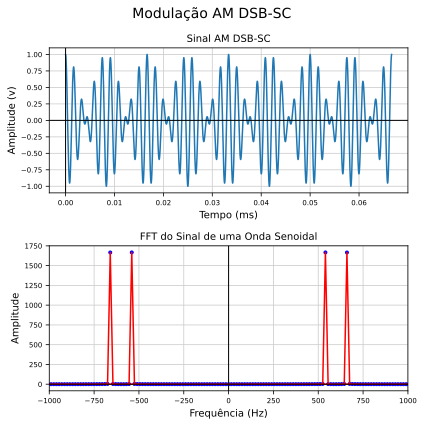

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Amplitde | Frequência da Modulante
Am = 1     # 1 Volt
wm = 60    # 60 Hz

# Amplitde | Frequência da portadora
Ap = 1     # 1 Volt
wp = 600    # 600 Hz

# sampling rate
sr = 1e5
# sampling interval
dt = 1.0/sr
tm = np.arange(0, 1/wm*4, dt)

# Gerando Sinal Modulante + Portadora
fc_sm = lambda Asn, wm, tm: Asn *\
        np.cos(2*np.pi*wm*tm)

# Sinal Modulado
sinal_modulador = fc_sm(Ap, wp, tm) *\
                  fc_sm(Am, wm, tm)

# Expectro da Frequência do sinal Modulado
F = np.fft.fft(sinal_modulador)  
freq = np.fft.fftfreq(np.size(F), d=dt)


plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(6, 6))
fig.suptitle("Modulação AM DSB-SC",
             fontsize=14)

# Domínio do tempo
ax1.plot(tm, sinal_modulador) 
# , label="$w_0 = 10 kHz$")
ax1.set_title("Sinal AM DSB-SC", fontsize=10)
ax1.set_xlabel("Tempo (ms)", fontsize=10)
ax1.set_ylabel("Amplitude (v)", fontsize=10)
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")

ax1.grid(which='both')
ax1.grid(which='major', color='#CCCCCC',
         linestyle='-', alpha=1)
ax1.grid(which='minor', color='#CCCCCC',
         linestyle=':', alpha=0.5)


# Domínio da freqüência
ax2.plot(freq, np.abs(F), ".", color="blue")
ax2.plot(freq, np.abs(F), 'r')
plt.xlim(-1000, 1000)
ax2.set_title(
    'FFT do Sinal de uma Onda Senoidal',
    fontsize=10)
ax2.set_xlabel("Frequência (Hz)", fontsize=10)
ax2.set_ylabel("Amplitude", fontsize=10)
ax2.axhline(0, linewidth=1., color="black")
ax2.axvline(0, linewidth=1., color="black")

ax2.grid(which='both')
ax2.grid(which='major', color='#CCCCCC',
         linestyle='-', alpha=1)
ax2.grid(which='minor', color='#CCCCCC',
         linestyle=':', alpha=0.5)

plt.savefig('g1.eps', format='eps')

plt.tight_layout()
plt.show()


---

2. **(Usando PYTHON) Descrever os sinais característicos da modulação AM SSB**
* Domínio do tempo e Domínio da Frequência.
* Mostrar os gráficos

**Descrição**

A modulação de faixa lateral única (SSB) é um método de modulação que consiste em transmitir apenas uma das bandas laterais da onda modulada, seja a faixa lateral superior ou a faixa lateral inferior. Essa técnica tem como objetivo deslocar o espectro do sinal modulante para uma nova posição no domínio da frequência. A modulação SSB é especialmente adequada para a transmissão de sinais de voz devido à lacuna de energia existente no espectro dos sinais de voz entre zero e algumas centenas de hertz. Ela é considerada a forma ideal de modulação de onda contínua, pois requer a menor quantidade de potência transmitida e a menor largura de banda do canal. No entanto, sua principal desvantagem está na maior complexidade e nas limitações de aplicabilidade.

**SSB superior**

$$
\begin{align}
S_{ssb_{superior}} &= \dfrac{1}{2}A_cA_mcos[2\pi (f_c + f_m)t]\\
&= \dfrac{1}{2}A_cA_mcos(2\pi f_c t) cos(2\pi f_m t) - \dfrac{1}{2}A_cA_msen(2\pi f_c t) sen(2\pi f_m t)
\end{align}
$$

**SSB Inferior**

$$
\begin{align}
S_{ssb_{superior}} &= \dfrac{1}{2}A_cA_mcos[2\pi (f_c + f_m)t]\\
&= \dfrac{1}{2}A_cA_mcos(2\pi f_c t) cos(2\pi f_m t) + \dfrac{1}{2}A_cA_msen(2\pi f_c t) sen(2\pi f_m t)
\end{align}
$$

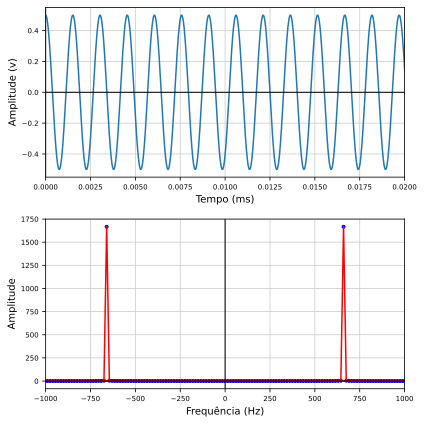

In [3]:
# Amplitde | Frequência da Modulante
Ac = 1     # 1 Volt
fc = 60    # 60 Hz

# Amplitde | Frequência da portadora
Am = 1     # 1 Volt
fm = 600    # 600 Hz

# sampling rate
sr = 1e5
# sampling interval
dt = 1.0/sr
tm = np.arange(0, 1/wm*4, dt)

# Gerando Sinal Modulante + Portadora
Sssb_superior = lambda Ac, Am, fc, fm, t:\
        (1/2.)*Ac*Am*np.cos(2*np.pi*fc*t)*np.cos(2*np.pi*fm*t) -\
        (1/2.)*Ac*Am*np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*fm*t)

# Sinal Modulado
sinal_modulado_ssb = Sssb_superior(Ac, Am, fc, fm, tm)

# Expectro da Frequência do sinal Modulado
F = np.fft.fft(sinal_modulado_ssb)  
freq = np.fft.fftfreq(np.size(F), d=dt)


plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
#fig.suptitle("Modulação AM SSB", fontsize=14)

# Domínio do tempo
ax1.plot(tm, sinal_modulado_ssb) # , label="$w_0 = 10 kHz$")
#ax1.set_title("Sinal AM SSB", fontsize=10)
ax1.set_xlabel("Tempo (ms)", fontsize=10)
ax1.set_ylabel("Amplitude (v)", fontsize=10)
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")
ax1.set_xlim(0, 0.02)
ax1.grid(which='both')
ax1.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax1.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


# Domínio da freqüência
ax2.plot(freq, np.abs(F), ".", color="blue")
ax2.plot(freq, np.abs(F), 'r')
plt.xlim(-1000, 1000)
#ax2.set_title('Tranfomada de Fourie do Sinal de uma Onda Senoidal', fontsize=10)
ax2.set_xlabel("Frequência (Hz)", fontsize=10)
ax2.set_ylabel("Amplitude", fontsize=10)
ax2.axhline(0, linewidth=1., color="black")
ax2.axvline(0, linewidth=1., color="black")

ax2.grid(which='both')
ax2.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax2.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.savefig('g2.eps', format='eps')

plt.tight_layout()
plt.show()


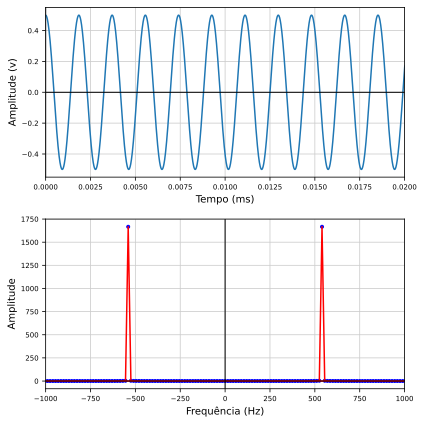

In [4]:
# Amplitde | Frequência da Modulante
Ac = 1     # 1 Volt
fc = 60    # 60 Hz

# Amplitde | Frequência da portadora
Am = 1     # 1 Volt
fm = 600    # 600 Hz

# sampling rate
sr = 1e5
# sampling interval
dt = 1.0/sr
tm = np.arange(0, 1/wm*4, dt)

# Gerando Sinal Modulante + Portadora
Sssb_superior = lambda Ac, Am, fc, fm, t:\
        (1/2.)*Ac*Am*np.cos(2*np.pi*fc*t)*np.cos(2*np.pi*fm*t) +\
        (1/2.)*Ac*Am*np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*fm*t)

# Sinal Modulado
sinal_modulado_ssb = Sssb_superior(Ac, Am, fc, fm, tm)

# Expectro da Frequência do sinal Modulado
F = np.fft.fft(sinal_modulado_ssb)  
freq = np.fft.fftfreq(np.size(F), d=dt)


plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
#fig.suptitle("Modulação AM SSB", fontsize=14)

# Domínio do tempo
ax1.plot(tm, sinal_modulado_ssb) # , label="$w_0 = 10 kHz$")
#ax1.set_title("Sinal AM SSB", fontsize=10)
ax1.set_xlabel("Tempo (ms)", fontsize=10)
ax1.set_ylabel("Amplitude (v)", fontsize=10)
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")
ax1.set_xlim(0, 0.02)
ax1.grid(which='both')
ax1.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax1.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


# Domínio da freqüência
ax2.plot(freq, np.abs(F), ".", color="blue")
ax2.plot(freq, np.abs(F), 'r')
plt.xlim(-1000, 1000)
#ax2.set_title('Tranfomada de Fourie do Sinal de uma Onda Senoidal', fontsize=10)
ax2.set_xlabel("Frequência (Hz)", fontsize=10)
ax2.set_ylabel("Amplitude", fontsize=10)
ax2.axhline(0, linewidth=1., color="black")
ax2.axvline(0, linewidth=1., color="black")

ax2.grid(which='both')
ax2.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax2.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.savefig('g2_.eps', format='eps')

plt.tight_layout()
plt.show()


---

3. **(Usando PYTHON) Descrever os sinais característicos da modulação AM VSB**
* Domínio do tempo e Domínio da Frequência.
* Mostrar os gráficos

**Descrição**

A modulação por faixa lateral vestigial (VSB) é uma técnica de modulação amplamente utilizada na transmissão de sinais de áudio e vídeo. Em comparação com a modulação de banda lateral única (SSB), a modulação VSB apresenta duas características distintas que a tornam uma opção viável em diversas aplicações. Primeiramente, ao invés de remover completamente a faixa lateral, um vestígio ou traço dela é transmitido, o que resulta no nome "faixa lateral vestigial". Além disso, a modulação VSB não transmite a outra faixa lateral completamente, mas, em vez disso, uma grande parte dela é transmitida. Essas características têm um impacto direto na largura de banda de transmissão do sinal modulado VSB, definindo assim suas propriedades e aplicabilidades. Neste resumo, exploraremos com mais detalhes essas características da modulação por faixa lateral vestigial (VSB) e como elas diferem da modulação SSB.

$$
\begin{align}
s(t) &= \dfrac{1}{2}A_cA_mcos(2\pi f_c t) cos(2\pi f_m t) + \dfrac{1}{2}A_cA_m(1-2k)sen(2\pi f_c t) sen(2\pi f_m t)
\end{align}
$$

Resumindo, dependendo de como o fator de atenuação $k$ da Eq. (1) é definido no
intervalo (0, 1), podemos identificar todas as diferentes formas senoidais das ondas moduladas lineares.

1. $k = 1/2$, para o qual s(t) se reduz para SDSB-SC
2. $k = 0$, para o qual s(t) se reduz para SSB inferior
   
   $k = 1$, para o qual s(t) se reduz para SSB superior

3. $0 < k < 1/2$, para o qual a versão atenuada da freqüência lateral superior define o vestígio de $s(t)$ $1/2 < k < 1$, para o qual a versão atenuada da freqüência lateral inferior define o vestígio de $s(t).$



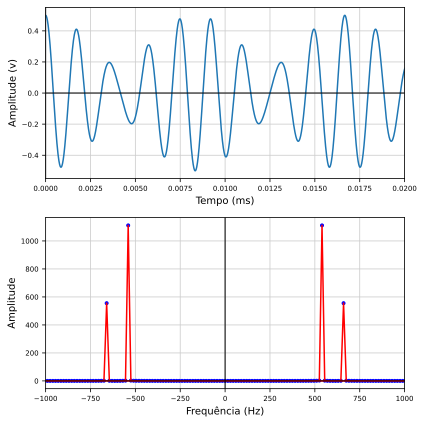

In [5]:
# Amplitde | Frequência da Modulante
Ac = 1     # 1 Volt
fc = 60    # 60 Hz

# Amplitde | Frequência da portadora
Am = 1     # 1 Volt
fm = 600    # 600 Hz

k = 1/1.5

# sampling rate
sr = 1e5
# sampling interval
dt = 1.0/sr
tm = np.arange(0, 1/wm*4, dt)

# Gerando Sinal Modulante + Portadora
Sssb_superior = lambda Ac, Am, fc, fm, t:\
        (1/2.)*Ac*Am*np.cos(2*np.pi*fc*t)*np.cos(2*np.pi*fm*t) -\
        (1/2.)*Ac*Am*(1-2*k)*np.sin(2*np.pi*fc*t)*np.sin(2*np.pi*fm*t)

# Sinal Modulado
sinal_modulado_ssb = Sssb_superior(Ac, Am, fc, fm, tm)

# Expectro da Frequência do sinal Modulado
F = np.fft.fft(sinal_modulado_ssb)  
freq = np.fft.fftfreq(np.size(F), d=dt)


plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
#fig.suptitle("Modulação AM VSB", fontsize=14)

# Domínio do tempo
ax1.plot(tm, sinal_modulado_ssb) # , label="$w_0 = 10 kHz$")
#ax1.set_title("Sinal AM VSB", fontsize=10)
ax1.set_xlabel("Tempo (ms)", fontsize=10)
ax1.set_ylabel("Amplitude (v)", fontsize=10)
ax1.axhline(0, linewidth=1., color="black")
ax1.axvline(0, linewidth=1., color="black")
ax1.set_xlim(0, 0.02)
ax1.grid(which='both')
ax1.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax1.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)


# Domínio da freqüência
ax2.plot(freq, np.abs(F), ".", color="blue")
ax2.plot(freq, np.abs(F), 'r')
plt.xlim(-1000, 1000)
#ax2.set_title('Tranfomada de Fourie do Sinal de uma Onda Senoidal', fontsize=10)
ax2.set_xlabel("Frequência (Hz)", fontsize=10)
ax2.set_ylabel("Amplitude", fontsize=10)
ax2.axhline(0, linewidth=1., color="black")
ax2.axvline(0, linewidth=1., color="black")

ax2.grid(which='both')
ax2.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
ax2.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.savefig('g34.eps', format='eps')

plt.tight_layout()
plt.show()
